# Importance Sampling Method

Consider the following integral:

## $ \int_{0}^{1} \frac{x^{-1/2}}{e^{x} + 1}dx $ 

which has the following weighted function

## $ w(x) = x^{-1/2} $

We want to estimate this integral using the Importance Sampling Method.

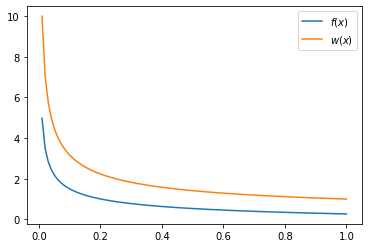

In [15]:
import numpy as np
from random import random
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

# Define IMC
def IMC(pdf, weighted, lower, upper, N):
    constant = quad(weighted, lower, upper)[0]
    Sum = 0
    for i in range(1, N + 1, 1):
        x = random()
        Sum = Sum + pdf(x)/weighted(x)
    return constant*Sum/N
    
N = 1000000 # total number of random points
w = lambda x: x**(-1/2)
f = lambda x: (x**(-1/2))/(np.exp(x) + 1)

xi = np.linspace(0.01, 1, 100) # we cannot divide by zero, so use 0.01 instead of 0
yi = f(xi)
plt.plot(xi, yi, label = '$ f(x) $')
plt.plot(xi, w(xi), label = '$ w(x) $')
plt.legend()
plt.show()

Based on this graph, $ w(x) = x^{-1/2} $ is a very good choice for the weighted function because it is very close to $ f(x) $ in terms of shape.

Using Importance Sampling Method with $ N = 1,000,000 $, the integral is estimated to be

In [17]:
IMC(f, w, 0, 1, N)

0.7597957790156706

Now, let us compare this value to what we get using Simpson's Rule.

In [19]:
from math import exp
def integral(function, lower, upper, n, method = 'Rectangle'):
    Sum = 0
    deltaX = (upper - lower)/n
    if method == 'Rectangle':
        x = np.linspace(lower, upper, n)
        for i in x:
            Sum = Sum + function(i)
        area = deltaX*Sum
        return area
    elif method == 'Trapezoid':
        x1 = lower
        x2 = x1 + deltaX
        while x2 <= upper:
            Sum = Sum + (deltaX/2)*(function(x1) + function(x2))
            x1 = x2
            x2 = x1 + deltaX
        return Sum
    elif method == 'Simpson':
        x1 = lower
        x2 = x1 + deltaX
        x3 = x2 + deltaX
        while x3 <= upper:
            Sum = Sum + (deltaX/3)*(function(x1) + 4*function(x2) + function(x3))
            x1 = x3
            x2 = x1 + deltaX
            x3 = x2 + deltaX
        return Sum
    else:
        print('Choose a method from any of the following: Rectangle, Trapezoid, Simpson')
        return None

Using Simpson's Rule with $ N = 1,000,000 $, the integral is estimated to be

In [22]:
integral(f, 0.01, 1, N, method = 'Simpson')

0.7390996260872071

So, we are pretty close. Let us now work with the other integral.

Consider the next integral:

## $ \int_{0}^{1} \frac{x^{-1}}{e^{x} + 1}dx $

Let us define the integrand as a function of x and plot it from $ x = 0 $ to $ x = 1 $ to see if maybe we can find the right weighted function for it.

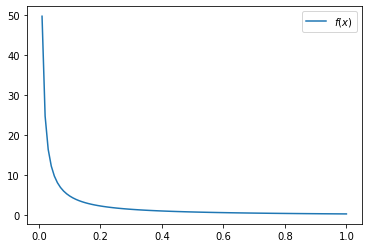

In [37]:
f = lambda x: 1/(x*(exp(x) + 1))
xi = np.linspace(0.01, 1, 100)
yi = [f(i) for i in xi]
plt.plot(xi, yi, label = '$f(x)$')
plt.legend()
plt.show()

One function that should come to mind when considering a weighted function $ w(x) $ is $ 1/x $. Let us add the graph of $ w(x) = 1/x $ to the plot and see how close its shape is to the shape of $ f(x) $.

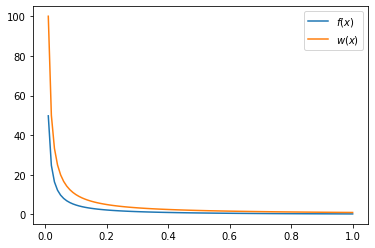

In [50]:
w = lambda x: 1/x
y2 = [w(j) for j in xi]
plt.plot(xi, yi, label = '$f(x)$')
plt.plot(xi, y2, label = '$w(x)$')
plt.legend()
plt.show()

So they are pretty close in terms of shape. This should reduce the variance significantly. Let us estimate the integral using the $ IMC $ method first and compare it with what we get later using Simpson's Rule.

Using Importance Sampling Method with $ N = 1,000,000 $, the integral is estimated to be

In [51]:
IMC(f, w, 0.0001, 1, N)

3.4990135331131675

Using Simpson's Rule with $ N = 1,000,000 $, the integral is estimated to be

In [53]:
integral(f, 0.001, 1, N, method = 'Simpson')

3.2106833416971283

Again, they are pretty close in value.